In [4]:
import sys, os, time
import matplotlib.pyplot as plt
import json

# Math, data
import numpy as np
import pandas as pd
pd.set_option('display.width', 140)

# GIS packages
os.environ['USE_PYGEOS'] = '0'
from shapely.geometry import Polygon, Point
import pyproj
import georasters as gr
import fiona
import fiona.crs
import geopandas as gp
import geopandas.tools as gpt
gpd = gp
import dask_geopandas

from pyproj import CRS
cea = CRS("ESRI:54034")
wgs84 = CRS("EPSG:4326")

# Plotting
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

# Mapping
import geoplot as gplt
import geoplot.crs as gcrs
import mapclassify as mc
import textwrap

# Big-Querry
from google.cloud import bigquery

In [5]:
client = bigquery.Client(project='gdelt-exploration-398717')

Seeting up the Google APIs with cloud services was a kinda of a hazzle
- Need to install the Google CLoud SDK. [install instructions](https://cloud.google.com/sdk/docs/install)
- Need to set up default Login. (Use you google developer account)
    - You set it up with the console/PowerShell `gcloud init`
    - Set up the default authenticator with your credentials
    - Make sure you have access to google BigQuerry API
    - Now, I needed to specify the project tht I'm working on for some reason
- Might need to also refer to [here](https://cloud.google.com/docs/authentication/application-default-credentials) and create a json credential
- To access it with python you need the package `google-api-python-client`

There are different GDELT datasets available [here](https://blog.gdeltproject.org/the-datasets-of-gdelt-as-of-february-2016/)

For some reason I need the big querry `google-cloud-bigquery==2.34.3`

In [15]:
# Perform a query.
QUERY = ("""
    SELECT
    ActionGeo_Lat, ActionGeo_Long, ActionGeo_FeatureID, Actor1Type1Code, Actor2Type1Code, SQLDATE, Year
    FROM
    `gdelt-bq.full.events`
    WHERE 
    ActionGeo_CountryCode = 'CI' -- Subset for Chile
    AND EventRootCode = '14' -- Subset Protest""")

query_job = client.query(QUERY)  # API request
df = query_job.to_dataframe()
df


ValueError: Please install the 'db-dtypes' package to use this function.

In [3]:
df.Year.value_counts().reset_index().sort_values('Year')

,Year,count
36,1920,35
42,1979,20
39,1980,29
44,1981,19
41,1982,27
13,1983,364
16,1984,260
20,1985,158
24,1986,125
26,1987,85


In [4]:
gdf = gpd.GeoDataFrame(df, 
                       geometry=gpd.points_from_xy(df.ActionGeo_Long, df.ActionGeo_Lat),
                       crs = wgs84)
gdf

,ActionGeo_Lat,ActionGeo_Long,ActionGeo_FeatureID,SQLDATE,Year,geometry
0,-33.7333,-70.7833,-891293,20130614,2013,POINT (-70.78330 -33.73330)
1,-45.4000,-72.7000,-897453,20140702,2014,POINT (-72.70000 -45.40000)
2,-38.7333,-72.9500,-893900,19990525,1999,POINT (-72.95000 -38.73330)
3,-26.3667,-69.2667,-895472,20150722,2015,POINT (-69.26670 -26.36670)
4,-27.5333,-70.3500,-891870,20110628,2011,POINT (-70.35000 -27.53330)
...,...,...,...,...,...,...
15758,-33.4500,-70.6667,-901202,20210528,2021,POINT (-70.66670 -33.45000)
15759,-33.4500,-70.6667,-901202,20210619,2021,POINT (-70.66670 -33.45000)
15760,-33.4500,-70.6667,-901202,20210524,2021,POINT (-70.66670 -33.45000)
15761,-33.4500,-70.6667,-901202,20210524,2021,POINT (-70.66670 -33.45000)


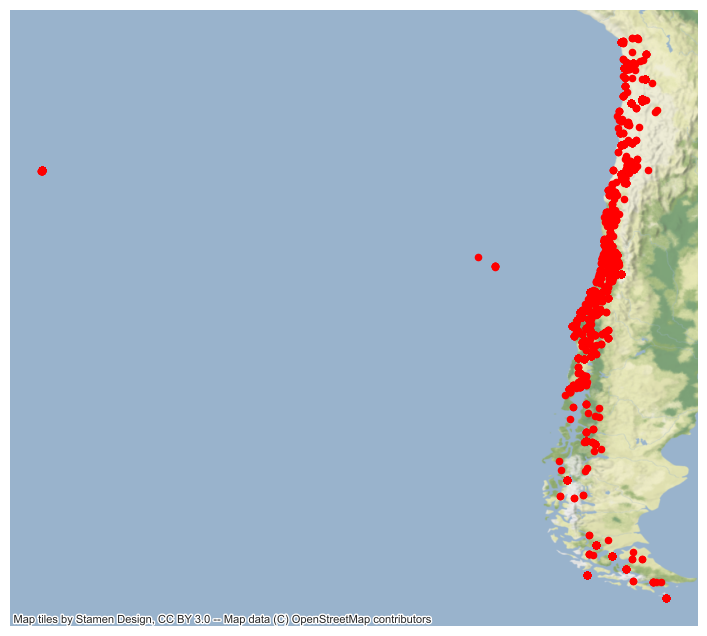

In [5]:
fig, ax = plt.subplots(figsize=(12, 8))
gdf.plot(ax=ax, color='red', markersize=20)

contextily.add_basemap(
    ax,
    crs=gdf.crs,
    source=contextily.providers.Stamen.TerrainBackground,
)
ax.set_axis_off()
plt.show()